In [2]:
conda install -y matplotlib

Solving environment: done

## Package Plan ##

  environment location: /opt/miniconda3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h5eee18b_7          18 KB
    brotli-bin-1.0.9           |       h5eee18b_7          19 KB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    fonttools-4.25.0           |     pyhd3eb1b0_0         632 KB
    freetype-2.12.1            |       h4a9f257_0         626 KB
    kiwisolver-1.4.2           |   py39h295c915_0          83 KB
    lcms2-2.12                 |       h3be6417_0         312 KB
    libbrotlicommon-1.0.9      |       h5eee18b_7          70 KB
    libbrotlidec-1.0.9         |       h5eee18b_7          31 KB
    libbrotlienc-1.0.9         |       h5eee18b_7         264 KB
    matplotlib-3.5.3           |   py39h06a4308_0           7 KB
    matpl

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 도수분포표
* 단순한 숫자의 나열인 데이터 자체로는 어떠한 정보도 알 수 없음
  + 80명의 학생의 키를 정리한 데이터에서 무엇을 알수 있을까?

* 각 학생들의 키는 모두 같지않고 제각각의 숫자로 나타남
* 다양한 수치로 나타나는 것을 **`분포한다`** 라고 함
* 분포가 생기는 이유는 어떤 **불확실성(!)** 이 있기 때문
* 이러한 불확실성이 제각각인 키의 수치를 발생시킨다고 여김
  + 하지만, 이러한 수치들에도 **고유한 특징** 이나 **반복(패턴)** 되는 것이 존재
  + 분포의 특성을 도출하기 위해 **`(확률에 근거한)통계`** 라는 도구 사용

* 분포화된 자료를 시각화하려면 히스토그램을 그려야 하는데
  + 먼저,**도수분포표** 를 작성해야 함
    - 최대/최소값
    - 계급class 설정 - **구간**
    - 계급값 설정
    - 계급내 데이터수 파악 - **빈도/도수frequency**
    - 각 계급 빈도의 상대비율 - **상대도수**
    - 각 계급의 누적합 - **누적도수**
* 히스토그램을 통해 **데이터의 분포(어떻게 모여 있는지)** 파악 가능

# 연속형 데이터 시각화 
+ 히스토그램

In [ ]:
studs = pd.read_csv('data/height.csv')
studs.head()

In [18]:
# 그래프의 x축 범위 지정
max = studs.height.max()
min = studs.height.min()

print(max,min,max-min)


169 143 26


In [20]:
# 구간 범위 설정 : 140 ~ 170
# x축 최소값 : 143 -> 140
# y축 최대값 : 169 -> 170
bmax = int(max / 10 ) * 10 + 10
bmin = int(min / 10 )* 10 
    
print(bmax,bmin)

170 140


In [23]:
# 구간 설정
# 구간은 numpy의 arrange 함수 사용
# arrange(최소값, 최대값+1, 구간간격)
bins = np.arange(bmin,bmax+1,5)

print(bins)

[140 145 150 155 160 165 170]


In [26]:
# 구간내 빈도
# 빈도는 numpy의 histogram 함수 사용
hist, bins = np.histogram(studs.height,bins)

print(hist)

[ 1  4 17 27 23  8]


In [40]:
# 계급값 ~ 각 구간을 대표하는 값, 구간의 중앙값
mid = (bins[1]-bins[0])/2
mdbins = bins[:len(bins)-1] + mid
print(mid, mdbins)

2.5 [142.5 147.5 152.5 157.5 162.5 167.5]


In [31]:
# 상대도수 계산
# 구간별 빈도수를 전체 빈도수 총합으로 나눈것
total = len(studs.height)
relfrq = hist / total
print(total, relfrq, sum(relfrq))

80 [0.0125 0.05   0.2125 0.3375 0.2875 0.1   ] 1.0


In [38]:
# 누적도수 계산
# 각 구간별 빈도의 누적합
# [1,2,3,4,5] => 누적합 [1,3,6,10,15]
# 누적합은 numpy의 cumsum 함수 사용
csfrq = np.cumsum(hist)

print(hist,csfrq)

[ 1  4 17 27 23  8] [ 1  5 22 49 72 80]


In [42]:
# 지금까지 계산한 결과 한눈에 보기
# 새로운 컬럼 추가 : 객체명['새로운컬럼명'] = 리스트
frqclass = [f'{i} ~ {i+5}' for i in np.arange(bmin,bmax,5)]

stdhist = pd.DataFrame({'frq':hist},index = pd.Index(frqclass,name='class'))
stdhist['relfrq'] = relfrq
stdhist['csfrq'] = csfrq
stdhist['mdbins'] = mdbins

stdhist

,frq,relfrq,csfrq,mdbins
class,,,,
140 ~ 145,1,0.0125,1,142.5
145 ~ 150,4,0.0500,5,147.5
150 ~ 155,17,0.2125,22,152.5
155 ~ 160,27,0.3375,49,157.5
160 ~ 165,23,0.2875,72,162.5
165 ~ 170,8,0.1000,80,167.5


## 히스토그램 시각화
+ hist(데이터, 구간, 옵션)

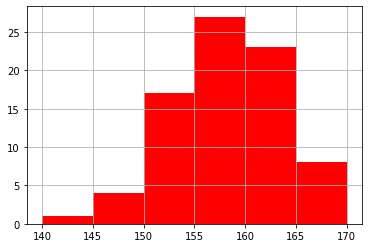

In [47]:
plt.hist(studs.height, bins, color='red')
plt.grid()

## 도수분포다각형
+ plot(x축값, y축값, 옵션)

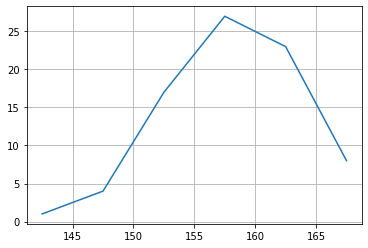

In [46]:
plt.plot(mdbins,hist)
plt.grid()

## pandas로 확률밀도 추정 그래프 그리기
+ 객체명.plot(kind='kde')

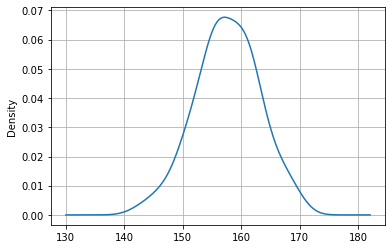

In [50]:
studs.height.plot(kind='kde')
plt.grid()

In [51]:
conda install -y seaborn

Solving environment: done

## Package Plan ##

  environment location: /opt/miniconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.12.0             |   py39h06a4308_0         428 KB
    ------------------------------------------------------------
                                           Total:         428 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/linux-64::seaborn-0.12.0-py39h06a4308_0 None



seaborn-0.12.0       | 428 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [52]:
import seaborn as sns

## seaborn 확률밀도 추정 그래프 그리기
+ histplot(대상, kde=True)

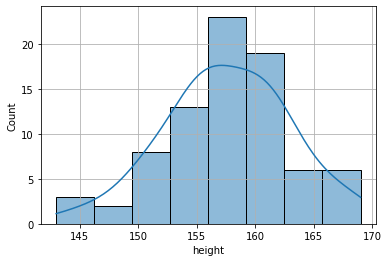

In [55]:
sns.histplot(studs.height,kde=True)
plt.grid()

# 확률밀도 추정KDE
* kernal density estimation
* 관측된 데이터들의 분포로부터 원래 변수의 **확률**분포특성을 추정
* 즉, 해당 변수에서 관측된 몇가지 데이터로부터 변수가 가질수 있는 모든 값들에 대한 밀도(확률)를 추정하는 것
  + 예) 수능을 위해 모의고사를 실시함
  + 모의고사를 통해 실제 수능시험 성적을 예측할 수 있음
  + 몇 회의 모의고사 성적에 대한 분포를 토대로
  + 실제로 받을 수능시험 성적에 대한 확률을 유추해 볼수 있음
* seaborn의 histplot이나 distplot으로 쉽게 그릴수 있음  

### 조선조 왕들 수명의 도수분포표 작성

In [75]:
kings = [73,62,45,53,38,16,51,28,37,30,56,30,33,56,
         66,54,40,33,59,36,82,48,44,22,32,67,52]

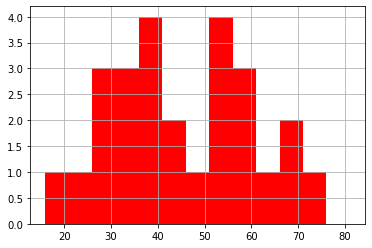

In [76]:
kmax = np.max(kings)
kmin = np.min(kings)

bins = np.arange(kmin,kmax+1,5)
plt.hist(kings, bins, color='red')
plt.grid()

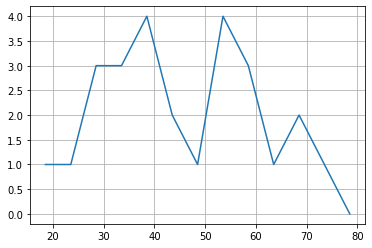

In [77]:
hist, bins = np.histogram(kings,bins)
mid = (bins[1]-bins[0])/2
mdbins = bins[:len(bins)-1] + mid
plt.plot(mdbins,hist)
plt.grid()

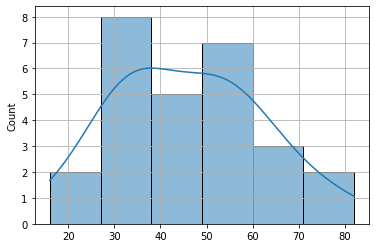

In [78]:
sns.histplot(kings,kde=True)
plt.grid()

### 청소년 핸드폰 사용시간에 대한 시각화 (1주일, 시간)
+ 도수분포표 작성
+ 히스토그램, KDE 작성

In [57]:
phone = [10,37,22,32,18,15,15,18,22,15,20,25,38,28,
         25,30,20,22,18,22,22,12,22,26,22,32,22,23,
         20,23,23,20,25,51,20,25,26,22,26,28,28,20,
         23,30,12,22,35,11,20,25]

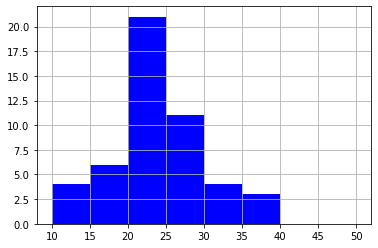

In [84]:
pmax = np.max(phone)
pmin = np.min(phone)

bins = np.arange(pmin,pmax+1,5)
plt.hist(phone,bins,color='blue')
plt.grid()

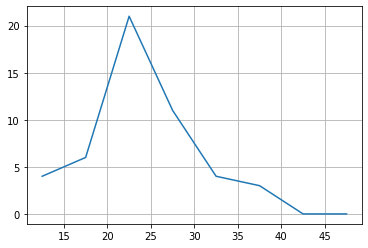

In [88]:
hist,bins = np.histogram(phone,bins)
mid = (bins[1]-bins[0])/2
mdbins = bins[:len(bins)-1]+mid
plt.plot(mdbins,hist)
plt.grid()

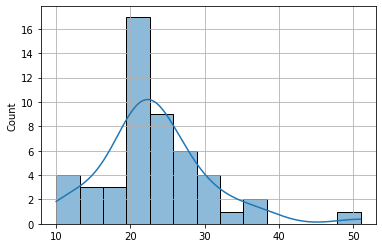

In [92]:
sns.histplot(phone,kde=True)
plt.grid()

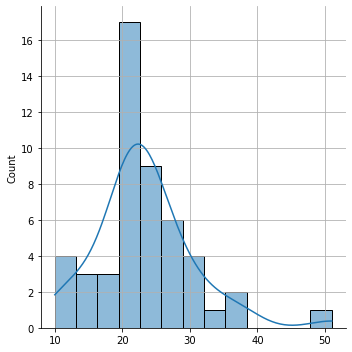

In [94]:
sns.displot(phone,kde=True)
plt.grid()